In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Final_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          500 non-null    int64  
 1   Unnamed: 0            500 non-null    int64  
 2   Email                 500 non-null    object 
 3   Address               500 non-null    object 
 4   Avatar                500 non-null    object 
 5   Avg. Session Length   500 non-null    float64
 6   Time on App           500 non-null    float64
 7   Time on Website       500 non-null    float64
 8   Length of Membership  500 non-null    float64
 9   Yearly Amount Spent   500 non-null    float64
 10  Unnamed: 9            0 non-null      float64
 11  Gender                500 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 47.0+ KB


In [4]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Unnamed: 9
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,0.0
mean,249.500000,249.500000,33.053194,12.052488,37.060445,3.533462,499.314038,NaN
std,144.481833,144.481833,0.992563,0.994216,1.010489,0.999278,79.314782,NaN
min,0.000000,0.000000,29.532429,8.508152,33.913847,0.269901,256.670582,NaN
25%,124.750000,124.750000,32.341822,11.388153,36.349257,2.930450,445.038277,NaN
50%,249.500000,249.500000,33.082008,11.983231,37.069367,3.533975,498.887875,NaN
75%,374.250000,374.250000,33.711985,12.753850,37.716432,4.126502,549.313828,NaN
max,499.000000,499.000000,36.139662,15.126994,40.005182,6.922689,765.518462,NaN


In [5]:
df.head(10)

,Unnamed: 0.1,Unnamed: 0,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Unnamed: 9,Gender
0,0,0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,NaN,M
1,1,1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,NaN,M
2,2,2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,NaN,M
3,3,3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,NaN,F
4,4,4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,NaN,M
5,5,5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448,NaN,F
6,6,6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175,NaN,F
7,7,7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146,NaN,M
8,8,8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409,NaN,M
9,9,9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385,NaN,F


In [6]:
df.drop(["Unnamed: 0","Unnamed: 9","Unnamed: 0.1"],axis=1,inplace=True)

In [7]:
df.head(10)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Gender
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,M
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,M
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,M
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,F
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,M
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448,F
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175,F
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146,M
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409,M
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385,F


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [9]:
df.head(10)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Gender
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,1
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,1
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,1
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,0
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,1
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448,0
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175,0
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146,1
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409,1
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385,0


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df.iloc[:,3:8]=sc.fit_transform(df.iloc[:,3:8])
df.head(10)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Gender
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,1.456351,0.607280,2.493589,0.550107,1.118654,1
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,-1.136502,-0.949464,0.206556,-0.870927,-1.351783,1
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,-0.052723,-0.727139,0.049681,0.572067,-0.148501,1
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,1.263010,1.676390,-0.335978,-0.413996,1.041684,0
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,0.279838,0.747770,0.471737,0.914422,1.263224,1
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,0.824797,-0.025737,-2.559311,1.963427,1.738975,0
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,-1.040368,-0.690823,-0.373133,1.153542,0.280911,0
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,-0.316721,0.301515,0.309976,0.902366,0.638478,1
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,0.942525,1.342851,0.469601,-0.260477,0.894630,1
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,-1.126138,-0.239987,0.083927,-0.331226,-0.910131,0


In [11]:
X=df[["Time on App","Yearly Amount Spent"]].values
X

array([[ 6.07280027e-01,  1.11865385e+00],
       [-9.49463723e-01, -1.35178302e+00],
       [-7.27139232e-01, -1.48500915e-01],
       [ 1.67639015e+00,  1.04168437e+00],
       [ 7.47769824e-01,  1.26322350e+00],
       [-2.57370717e-02,  1.73897478e+00],
       [-6.90822787e-01,  2.80911422e-01],
       [ 3.01515038e-01,  6.38478389e-01],
       [ 1.34285066e+00,  8.94629755e-01],
       [-2.39986536e-01, -9.10131440e-01],
       [ 1.29526827e+00, -8.46594230e-02],
       [-4.70897199e-01,  2.90569095e-01],
       [-1.09863731e+00, -1.14435790e+00],
       [ 9.12926982e-01,  9.35210824e-01],
       [ 1.10371999e+00, -3.64247484e-01],
       [ 5.88104940e-01, -4.73693365e-01],
       [-3.20800990e-01, -5.23330836e-01],
       [-3.95614343e-02, -1.15616832e+00],
       [ 2.68107489e+00, -5.93148349e-01],
       [ 1.95032608e+00,  1.33459242e+00],
       [-6.91684916e-01,  4.46665171e-01],
       [ 8.31130077e-01, -1.00176482e+00],
       [ 1.33512580e+00, -7.92554983e-01],
       [-3.

In [12]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


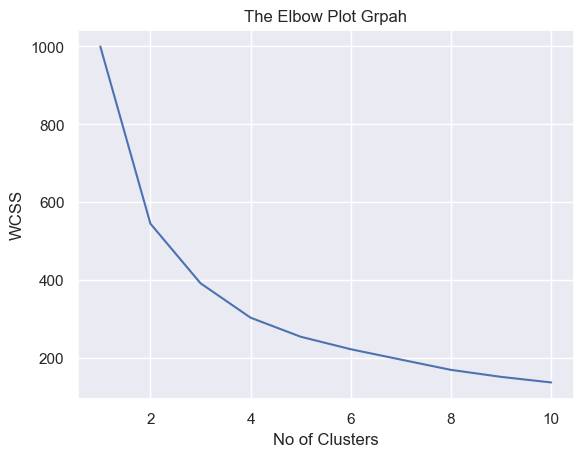

In [13]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Plot Grpah')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
Y=kmeans.fit_predict(X)


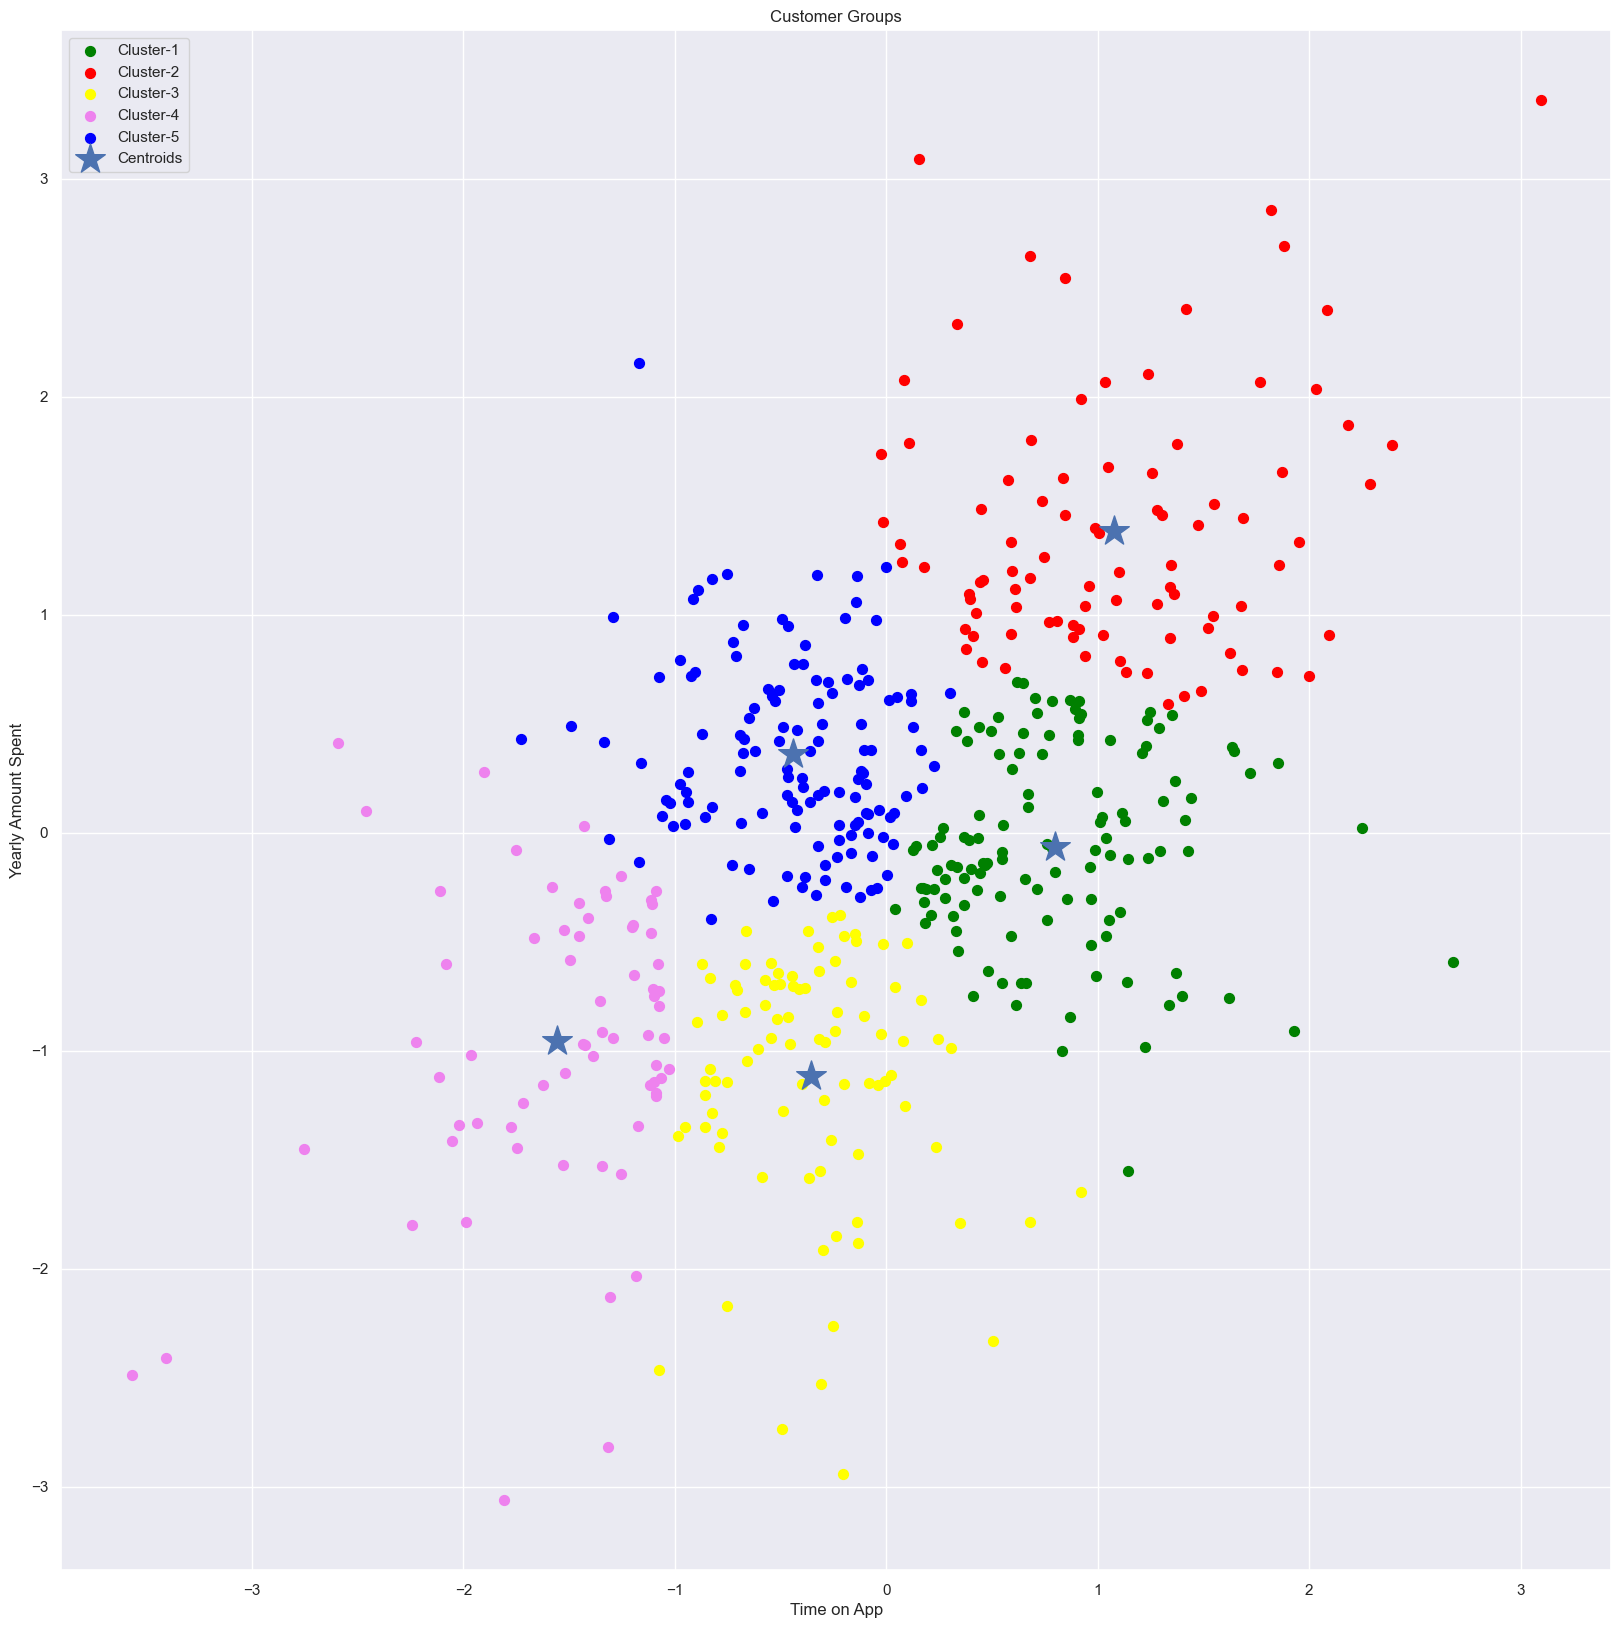

In [26]:
plt.figure(figsize=(20,20))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Cluster-1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='Cluster-2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='yellow',label='Cluster-3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='violet',label='Cluster-4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='blue',label='Cluster-5')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='b',marker="*",s=500,label='Centroids')
plt.legend()
plt.title('Customer Groups')
plt.xlabel('Time on App')
plt.ylabel('Yearly Amount Spent')
plt.show()